In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import inspect

In [18]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [20]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
#loop trough all columns, to see what the name and type is:
columns = inspector.get_columns('station')
columns 
for col in columns:
    print(col['name'], col['type'])
    
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
#now I can aswer all questions with-out opening SQL 
columns = inspector.get_columns('measurement')
columns 
for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# this is step is needed because I want to know the data I am workign on. I may not be able to trust the data based on the cil name:
session.query(Station.station, Station.name,Station.latitude,Station.longitude,Station.elevation).all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [22]:

#same type of query for maeasurments to see the type of data
session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [23]:
# now I have an idea what the data holds! :D 
# let us begin with the questions

# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# 2017-08-23, 
# Calculate the date 1 year ago from the last data point in the database

lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#*** we the first one because we are doing desc and we need the first date, which we do now. 
#***I can also grab teh last date when ever I want it by: lastdate[0]

# Perform a query to retrieve the data and precipitation scores
# *** datetime Pyhton substract day: d = datetime.today() - timedelta(days=days_to_subtract)
# *** datetime python convert string to date: date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
lastdate = dt.datetime.strptime(str(lastdate[0]), '%Y-%m-%d')
yearago = lastdate - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=yearago).order_by(Measurement.date.asc()).all()

results

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

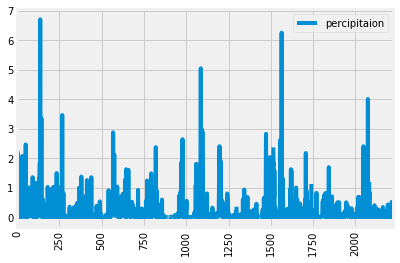

In [25]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df= pd.DataFrame(results, columns=['date', 'percipitaion'])
# Sort the dataframe by date
df.sort_values(by='date')
#df.set_index('date',inplace=True)
df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
#*** 
df.plot(rot=90)

![precipitation](Images/precipitation.png)

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,tobs
count,351.000000
mean,73.096866
std,4.735491
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


![describe](Images/describe.png)

In [44]:
# Design a query to show how many stations are available in this dataset?
#session.query(func.count(Measurement.station)).all()
result= session.query(func.count(Station.station)).all()
result 

[(9)]

In [46]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results= session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
results


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#*** the most active station'USC00519281'

results= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.station=='USC00519281').all()
results


[(54.0, 85.0, 71.66378066378067)]

In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# *** I am going to reuse the yearago- highest# of temp observ='USC00519281'
results = session.query(Measurement.tobs).\
  filter(Measurement.station=='USC00519281').\
  filter(Measurement.date >= yearago).all()
results

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

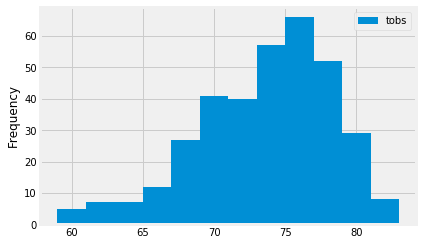

In [48]:
df=pd.DataFrame(result,columns=['tobs'])
#Plot the results as a histogram with bins=12.df.pyplot.hist(bins=12)
df.plot.hist(bins=12
            )

![precipitation](Images/station-histogram.png)

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
results=calc_temps('2011-02-28', '2011-02-28')
print(results)

[(65.0, 69.66666666666667, 75.0)]


[(65.0, 69.66666666666667, 75.0)]


Text(0, 0.5, 'Temperature (F)')

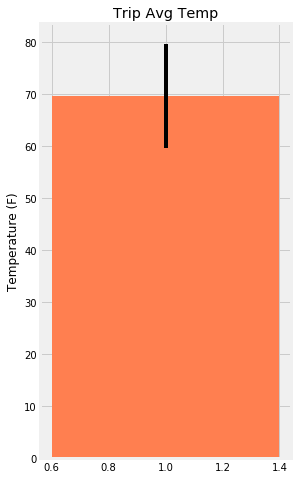

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
results=calc_temps('2011-02-28', '2011-02-28')
print(results)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
peak = results[0][2] - results[0][0]
bar = ax.bar(1, results[0][1], yerr = peak, color = "coral")
plt.title("Trip Avg Temp")
plt.ylabel("Temperature (F)")




In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Measurement.station, Station.name,
              Station.latitude, Station.longitude, 
              Station.elevation, func.count(Measurement.prcp)).\
group_by(Measurement.station, Station.name,
              Station.latitude, Station.longitude, 
              Station.elevation).order_by(func.count(Measurement.prcp).desc()).all()


[('USC00519281',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  2772),
 ('USC00519281', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2772),
 ('USC00519281',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  2772),
 ('USC00519281',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2772),
 ('USC00519281', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2772),
 ('USC00519281',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  2772),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2772),
 ('USC00519281', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 2772),
 ('USC00519281',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2772),
 ('USC00513117',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  2696),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2696),
 ('USC00513117',
  'KUALOA RANCH HEAD

## Optional Challenge Assignment

In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [36]:
#Calculate the rainfall per weather station using the previous year's matching dates.


rainfall_summer = session.query(Station.name, func.sum(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date.between('2016-06-01', '2016-08-31')).\
    group_by(Station.name).all()


rainfall_fall = session.query(Station.name, func.sum(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date.between('2016-09-01', '2016-11-30')).\
    group_by(Station.name).all()


rainfall_winter = session.query(Station.name, func.sum(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date.between('2016-12-01', '2017-02-29')).\
    group_by(Station.name).all()


rainfall_spring = session.query(Station.name, func.sum(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date.between('2017-03-01', '2017-05-31')).\
    group_by(Station.name).all()

print("Rainfall in Summer: {}\n\nRainfall in Fall: {}\n\nRainfall in Winter: {}\n\nRainfall in Spring: {}".\
      format(rainfall_summer, rainfall_fall, rainfall_winter, rainfall_spring))

Rainfall in Summer: [('KANEOHE 838.1, HI US', 6945.0), ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 5910.0), ('MANOA LYON ARBO 785.2, HI US', 6168.0), ('PEARL CITY, HI US', 4596.0), ('WAIHEE 837.5, HI US', 7012.0), ('WAIKIKI 717.2, HI US', 7189.0), ('WAIMANALO EXPERIMENTAL FARM, HI US', 6956.0)]

Rainfall in Fall: [('KANEOHE 838.1, HI US', 6897.0), ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 5808.0), ('MANOA LYON ARBO 785.2, HI US', 6507.0), ('PEARL CITY, HI US', 3800.0), ('WAIHEE 837.5, HI US', 6912.0), ('WAIKIKI 717.2, HI US', 7020.0), ('WAIMANALO EXPERIMENTAL FARM, HI US', 6978.0)]

Rainfall in Winter: [('KANEOHE 838.1, HI US', 6240.0), ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 5761.0), ('MANOA LYON ARBO 785.2, HI US', 5945.0), ('PEARL CITY, HI US', 3828.0), ('WAIHEE 837.5, HI US', 6211.0), ('WAIKIKI 717.2, HI US', 6218.0), ('WAIMANALO EXPERIMENTAL FARM, HI US', 5705.0)]

Rainfall in Spring: [('KANEOHE 838.1, HI US', 6640.0), ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 5736.0), ('MANOA

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

def daily_normals(date):
    M_D = date.split('-')
    TMIN = session.query(func.min(Measurement.tobs)).\
           filter(func.strftime("%m", Measurement.date) == M_D[0]).\
           filter(func.strftime("%d", Measurement.date) == M_D[1]).all()
    TMAX = session.query(func.max(Measurement.tobs)).\
           filter(func.strftime("%m", Measurement.date) == M_D[0]).\
           filter(func.strftime("%d", Measurement.date) == M_D[1]).all()
    TAVG = session.query(func.avg(Measurement.tobs)).\
           filter(func.strftime("%m", Measurement.date) == M_D[0]).\
           filter(func.strftime("%d", Measurement.date) == M_D[1]).all()
    result = TMIN, TMAX, TAVG
    temp_list = list(np.ravel(result))
    
    return temp_list

In [38]:
trip = ["07-"+str(i) for i in range(17, 31)]
trip_data = [daily_normals(j) for j in trip]

trip_df = pd.DataFrame(trip_data, columns=["tmin", "tmax", "tavg"])
trip_df['Trip Date'] = trip
trip_df.set_index('Trip Date', inplace=True)
trip_df

,tmin,tmax,tavg
Trip Date,,,
07-17,70.0,83.0,76.301887
07-18,72.0,83.0,76.637931
07-19,68.0,83.0,75.890909
07-20,69.0,82.0,75.462963
07-21,69.0,83.0,76.924528
07-22,69.0,81.0,75.788462
07-23,70.0,84.0,76.203704
07-24,69.0,81.0,76.555556
07-25,67.0,84.0,76.890909


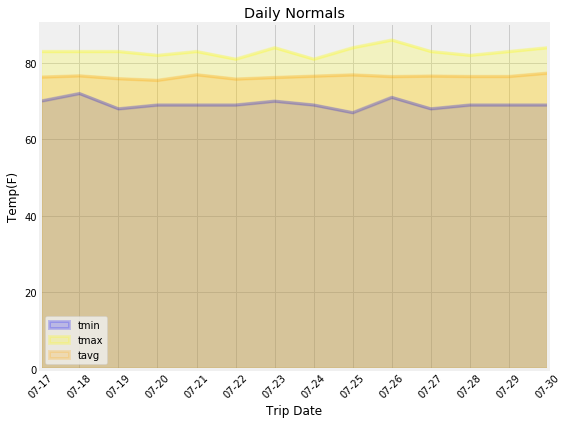

In [39]:
# Plot the daily normals as an area plot with `stacked=False`

trip_plot = trip_df.plot(kind='area', stacked=False, alpha=0.2,
                         color=['blue', 'yellow', 'orange'], 
                         figsize=(8, 6), lw=3)
trip_plot.set_title('Daily Normals')
trip_plot.set_ylabel('Temp(F)')
trip_plot.set_xticks(np.arange(0, len(trip)))
trip_plot.set_xticklabels(labels=trip, rotation=45)
plt.tight_layout()
plt.savefig("daily_normal_analysis.png", bbox_inches='tight')
plt.show()
